<a href="https://colab.research.google.com/github/Thurab/NYC-Taxi-Trip-Duration-Regression/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Alma Better/ML/Capstone_Project_LR/Copy of NYC Taxi Data.csv')

# Exploring the Dataset

In [ ]:
df.shape

(1458644, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [ ]:
df.tail(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [ ]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
df.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2946147,NaN,2016-02-09 21:03:38,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [ ]:
# Looking any duplicated rows
len(df[df.duplicated()])

0

In [ ]:
df.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

In [ ]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

No null values in the data

# Splitting date time column w.r.t their day 

In [ ]:
# pickup_datetime datatype is in type object, we will be converting it into datetime64
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [ ]:
# extracting days from datetime datatype(pickup and drop)
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  pickup_day          1458644 non-null  object        
 12  dropoff_day         1458644 non-null  object        
dtypes: datetime6

In [ ]:
# Getting weekdays
df['pickup_day_no']=df['pickup_datetime'].dt.weekday
df['dropoff_day_no']=df['dropoff_datetime'].dt.weekday

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6


In [ ]:
# Getting hours and month
df['pickup_hours']=df['pickup_datetime'].dt.hour
df['dropoff_hours']=df['dropoff_datetime'].dt.hour
df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hours,dropoff_hours,pickup_month,dropoff_month
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6


In [ ]:
#Function to evaluate the shift which is morning or afternoon
def calc_shifts(X):
  '''Function to evaluate the shift which is morning or afternoon'''
  if X>6 and X<12:
    return 'Morning'
  if X>=12 and X<16:
    return 'Afternoon'
  if X>=16 and X<22:
    return ' Evening'
  else:
    return 'Late night'

In [ ]:
df['pickup_shift']=df['pickup_hours'].apply(calc_shifts)
df['dropoff_shift']=df['dropoff_hours'].apply(calc_shifts)

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hours,dropoff_hours,pickup_month,dropoff_month,pickup_shift,dropoff_shift
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Evening,Evening
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night


# Using great_circle from geopy library to calculate the distance b/t two geo locations

In [ ]:
from geopy.distance import great_circle

In [ ]:
def calc_distance(pickup_latitude,pickup_longitude,drop_latitude,drop_longitude):
  '''calculates the distnce between latitude and longitude'''
  start_coordinate=(pickup_latitude,pickup_longitude)
  stop_coordinate=(drop_latitude,drop_longitude)

  return great_circle(start_coordinate,stop_coordinate).km

In [ ]:
# Creating a distance column to store the value

df['distance']=df.apply(lambda x: calc_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis=1)

In [ ]:
df.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hours,dropoff_hours,pickup_month,dropoff_month,pickup_shift,dropoff_shift,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510


# EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


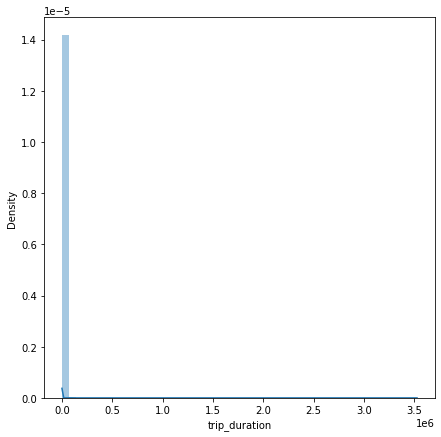

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


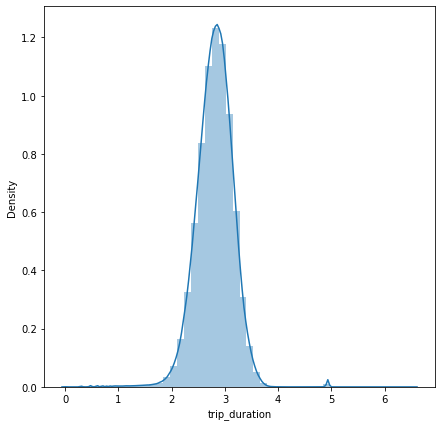

In [ ]:
# Applying log transformation to look whether the D.V looks like normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.log10(df['trip_duration']))

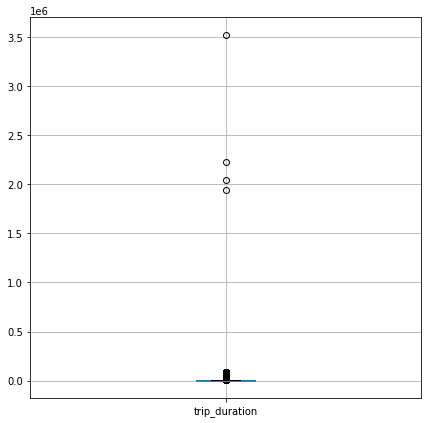

In [ ]:
plt.figure(figsize=(7,7))
df.boxplot('trip_duration')

Box plot shows there is some outliers exist in D.V

# Looking for any outliers exists in the data

In [ ]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
1034341          1
346102           1
1360664          1
1382872          1
207497           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
#Looking at the outliers data
print(f"below 10000 duration is {df[df['trip_duration']<=10000].shape}")
print(f"above 10000 duration is {df[df['trip_duration']>10000].shape}")

below 10000 duration is (1456521, 22)
above 10000 duration is (2123, 22)


In [ ]:
#Taking a copy of original data
df_copy=df.copy()

In [ ]:
df_copy.shape

(1458644, 22)

In [ ]:
#Removing the outliers
df_copy=df_copy[df_copy['trip_duration']<=10000]

In [ ]:
df_copy.shape

(1456521, 22)

2123 rows are removed and lets explore the Box Plot

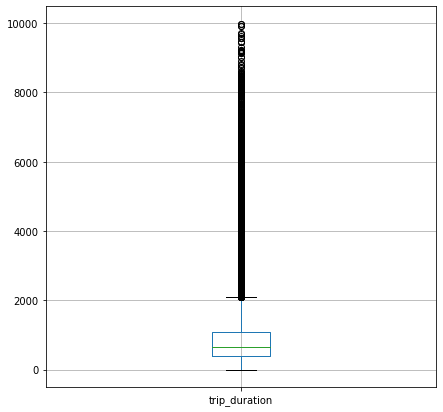

In [ ]:
plt.figure(figsize=(7,7))
df_copy.boxplot('trip_duration')

In [ ]:
df_copy=df_copy[df_copy['trip_duration']<=2000]

In [ ]:
df_copy.shape

(1374220, 22)

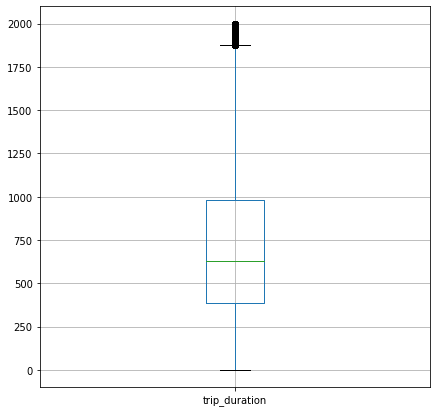

In [ ]:
plt.figure(figsize=(7,7))
df_copy.boxplot('trip_duration')

# Boxplot with the Distance

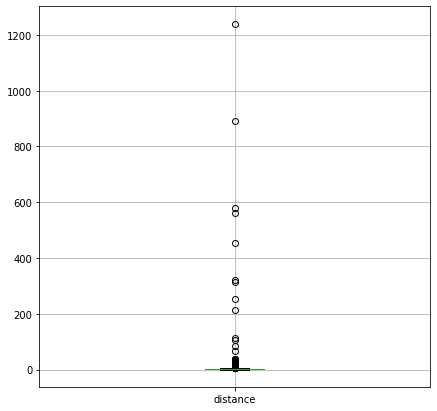

In [ ]:
plt.figure(figsize=(7,7))
df_copy.boxplot('distance')

few of outliers exist after 10 KM distance and removing all of them

In [ ]:
df_copy[df_copy['distance']<=200].shape

(1374211, 22)

In [ ]:
df_copy[df_copy['distance']<=10].shape

(1334244, 22)

In [ ]:
df_copy=df_copy[df_copy['distance']<10]

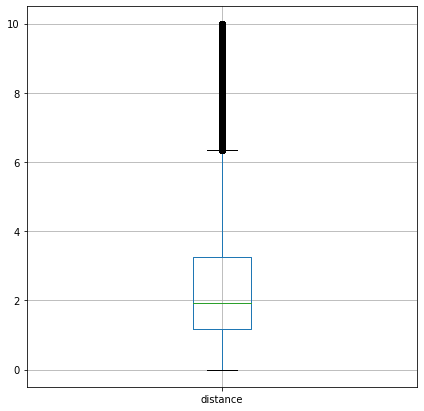

In [ ]:
plt.figure(figsize=(7,7))
df_copy.boxplot('distance')

# Lets see the scatter plot between distance and trip duration


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


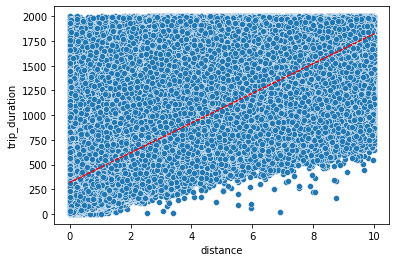

In [ ]:
sns.scatterplot(df_copy['distance'],df_copy['trip_duration'])

z = np.polyfit(df_copy['distance'], df_copy['trip_duration'], 1)
y_hat = np.poly1d(z)(df_copy['distance'])
plt.plot(df_copy['distance'], y_hat, "r--", lw=1)

In [ ]:
# Storing numerical variables
numeric_data=df_copy.describe().columns
numeric_data

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hours', 'dropoff_hours',
       'pickup_month', 'dropoff_month', 'distance'],
      dtype='object')

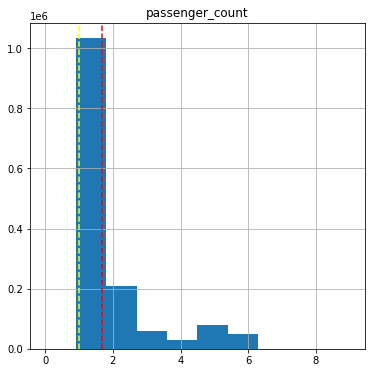

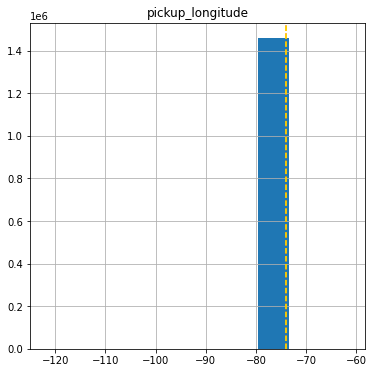

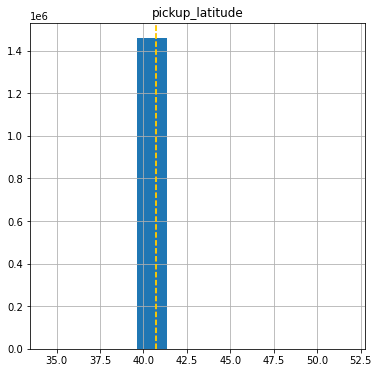

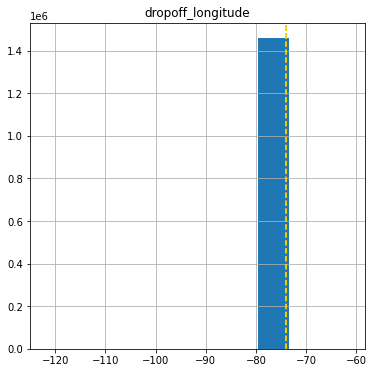

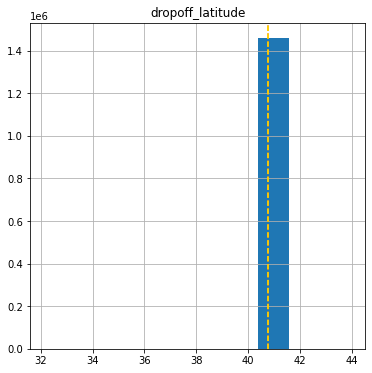

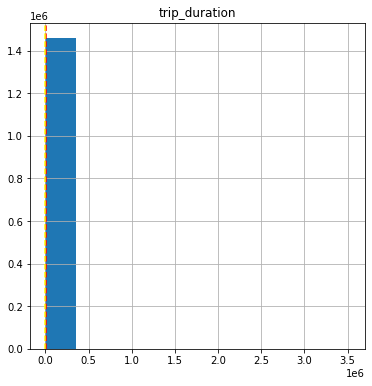

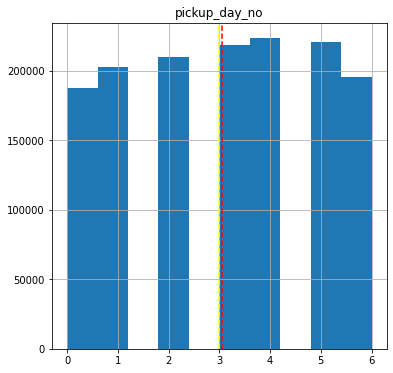

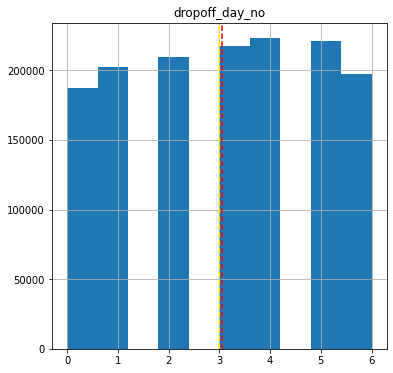

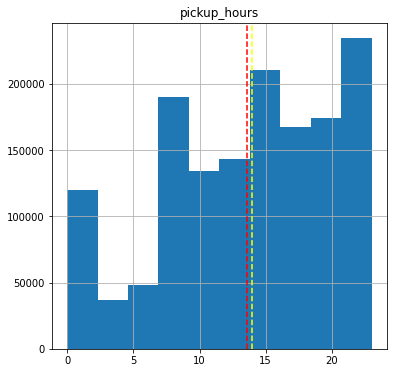

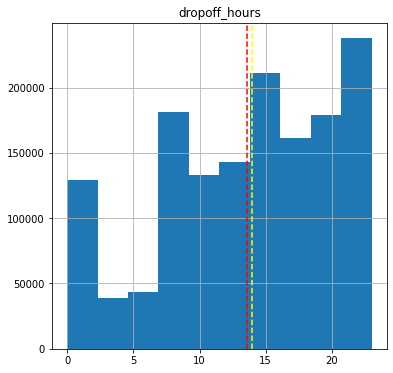

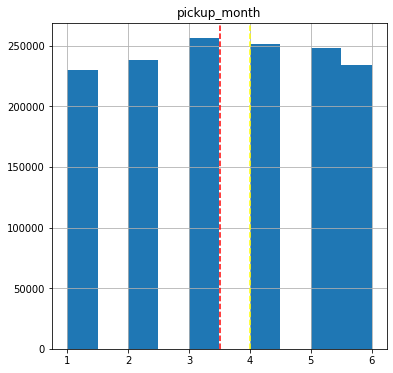

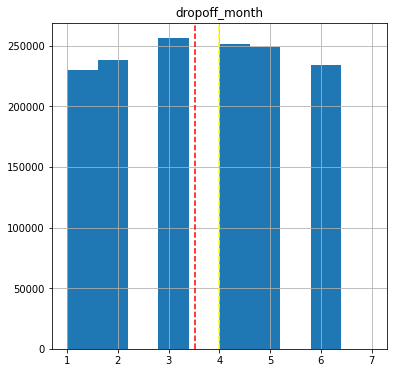

In [ ]:
#Looking histogram of all necessary I.V variables
for column in numeric_data[1:-1]:
  plt.figure(figsize=(6,6))
  df[column].hist()
  plt.title(column)
  plt.axvline(df[column].mean(),color='red',linestyle='dashed')#Mean in Red
  plt.axvline(df[column].median(),color='yellow',linestyle='dashed')#Median in yellow

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


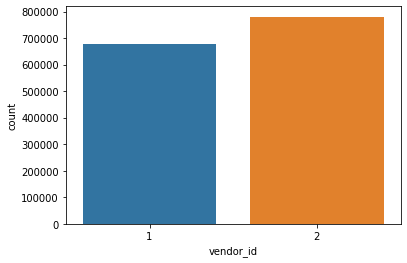

In [ ]:
# Looking at Vendor ID
sns.countplot(df['vendor_id'])

In [ ]:
df_copy['vendor_id'].value_counts()

2    711303
1    622941
Name: vendor_id, dtype: int64

In [ ]:
df_copy['passenger_count'].value_counts()

1    948893
2    189910
5     71033
3     54520
6     44220
4     25609
0        54
7         3
9         1
8         1
Name: passenger_count, dtype: int64

In Passenger count there is some wrong data such that passengers with count 0,7,8,9 are not to be considered so dropping them

In [ ]:
df_copy=df_copy[df_copy['passenger_count']!=0]
df_copy=df_copy[df_copy['passenger_count']<=6]

In [ ]:
df_copy['passenger_count'].value_counts()

1    948893
2    189910
5     71033
3     54520
6     44220
4     25609
Name: passenger_count, dtype: int64

In [ ]:
df_copy['distance'].value_counts()

0.000000    5753
0.000424      47
0.000424      44
0.000424      36
0.000424      18
            ... 
1.440062       1
4.276123       1
1.848738       1
0.769845       1
1.852552       1
Name: distance, Length: 1328041, dtype: int64

There are 5888 trips with 0 distance. We will remove this 0 distance


In [ ]:
#Considering only non zero distance data
df_copy=df_copy[df_copy['distance']!=0]

In [ ]:
df_copy.shape

(1328432, 22)

In [ ]:
df_copy['distance'].value_counts()

0.000424    47
0.000424    44
0.000424    36
0.000424    18
0.000424    17
            ..
4.276123     1
1.848738     1
0.769845     1
3.134015     1
2.911414     1
Name: distance, Length: 1328040, dtype: int64

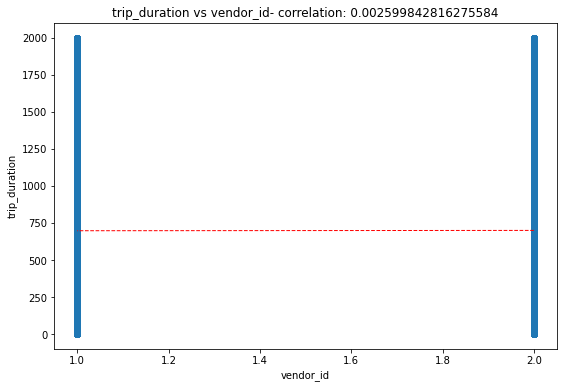

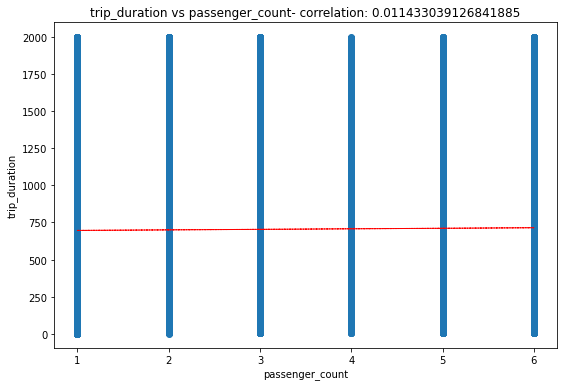

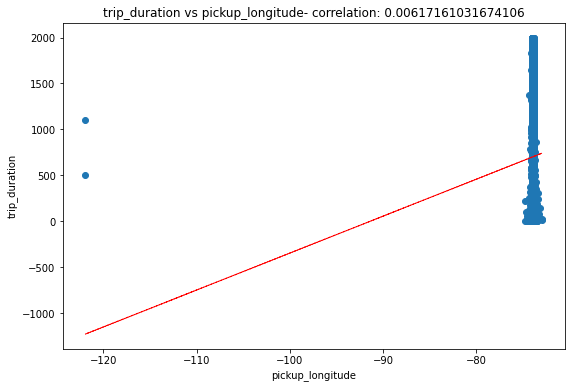

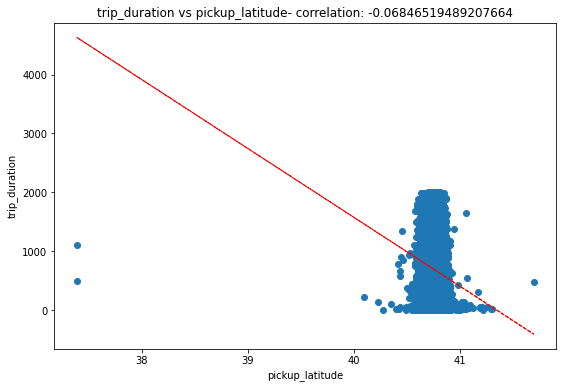

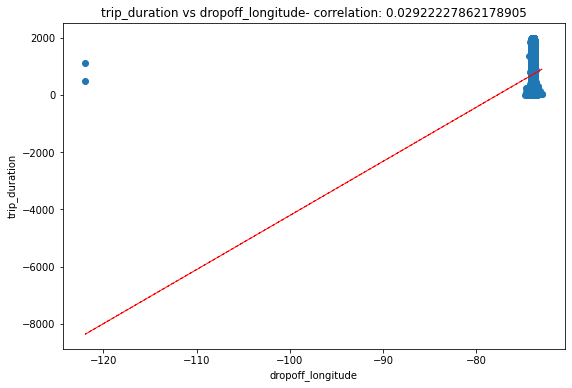

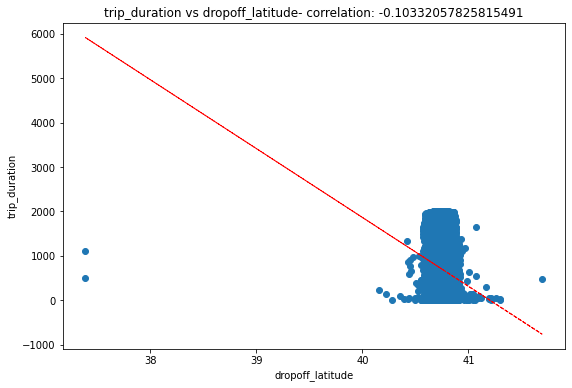

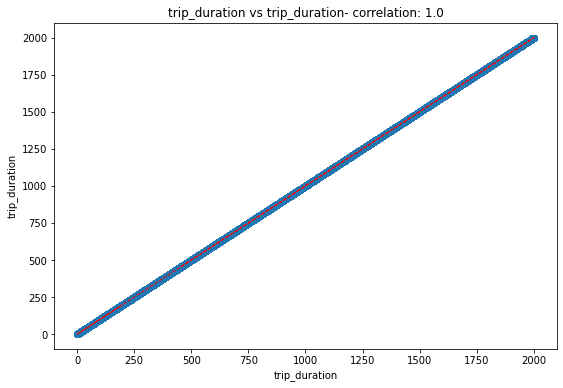

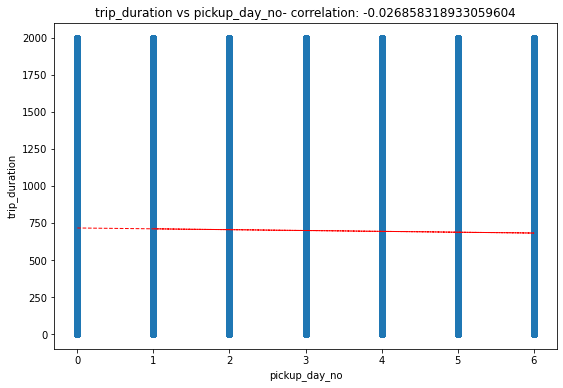

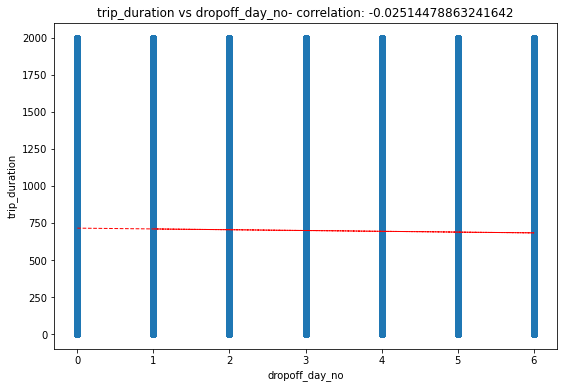

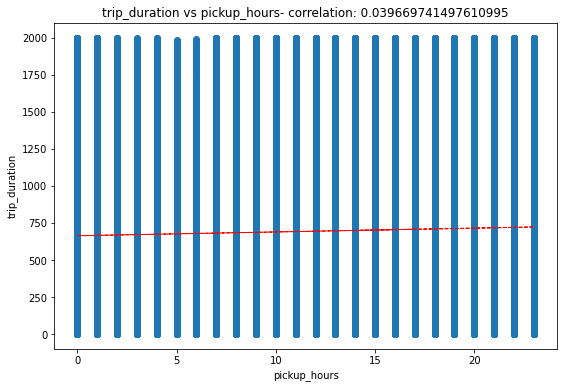

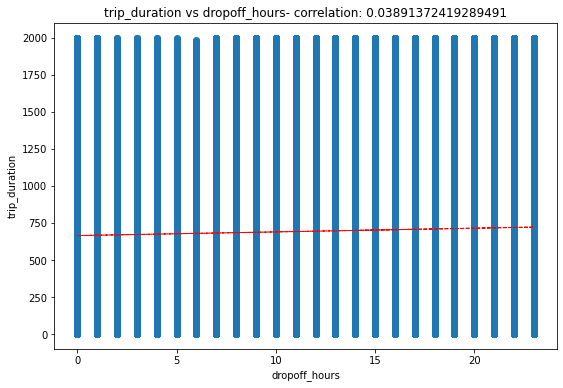

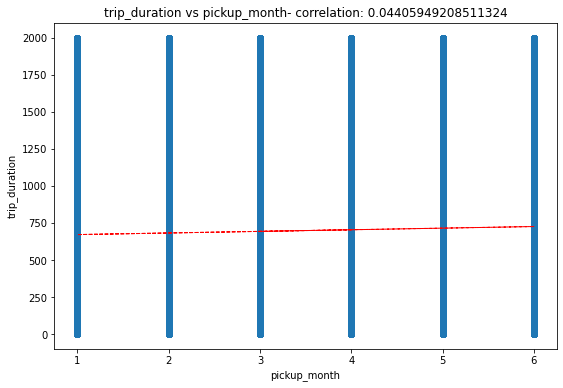

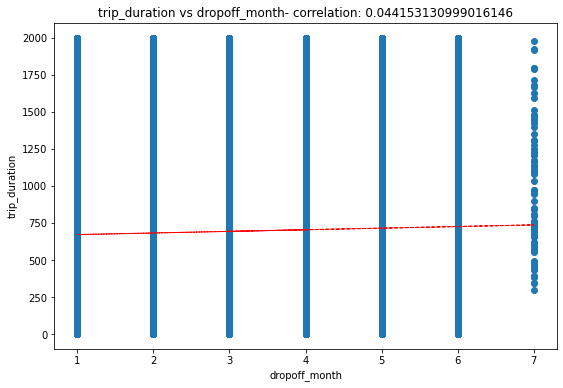

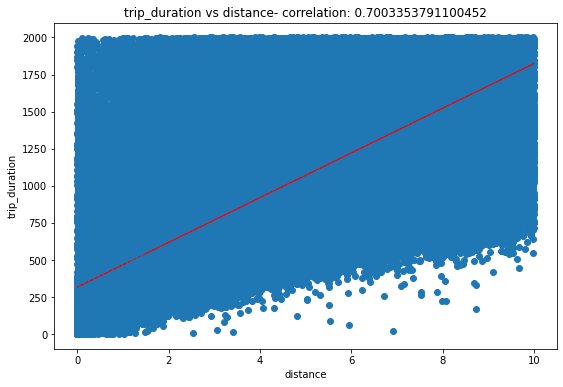

In [ ]:
for col in numeric_data:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df_copy[col]
    label = df_copy['trip_duration']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('trip_duration')
    ax.set_title('trip_duration vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df_copy[col], df_copy['trip_duration'], 1)
    y_hat = np.poly1d(z)(df_copy[col])

    plt.plot(df_copy[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
df_copy.shape

(1328432, 22)

# Analyzing Trips based on hours,day and week

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'dropoff day')

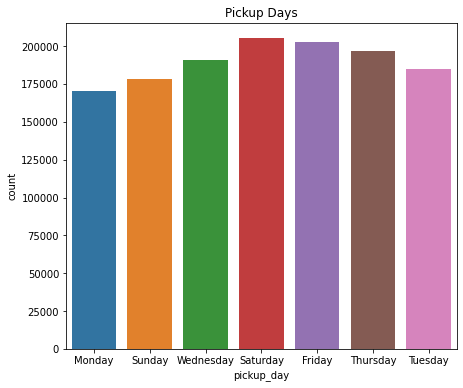

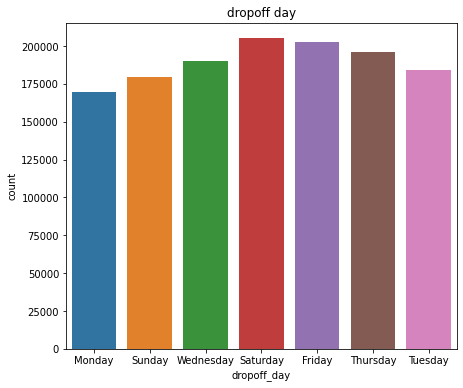

In [ ]:
# Trips based on Days
plt.figure(figsize=(7,6))
sns.countplot(df_copy['pickup_day'])
plt.title('Pickup Days')
plt.figure(figsize=(7,6))
sns.countplot(df_copy['dropoff_day'])
plt.title('dropoff day')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


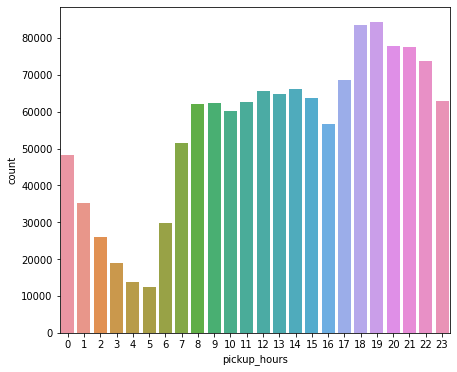

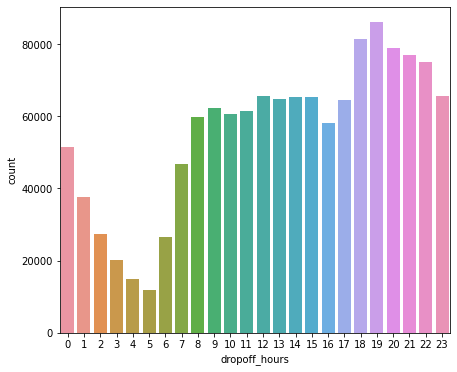

In [ ]:
# Trips based on hours
plt.figure(figsize=(7,6))
sns.countplot(df_copy['pickup_hours'])
plt.figure(figsize=(7,6))
sns.countplot(df_copy['dropoff_hours'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


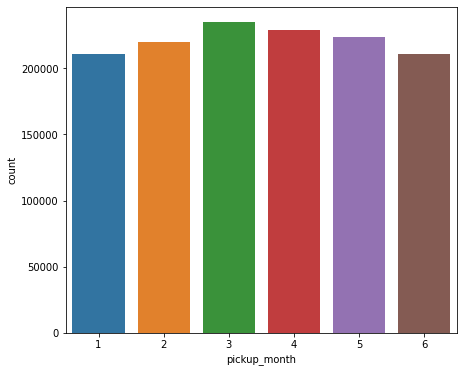

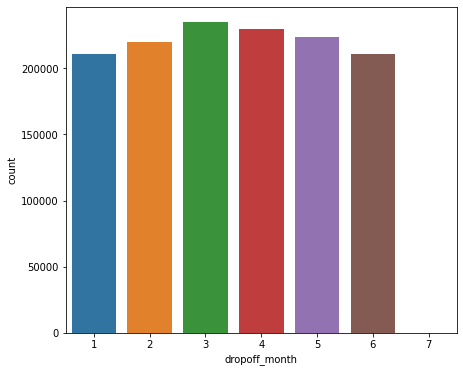

In [ ]:
# Trips based on month
plt.figure(figsize=(7,6))
sns.countplot(df_copy['pickup_month'])
plt.figure(figsize=(7,6))
sns.countplot(df_copy['dropoff_month'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


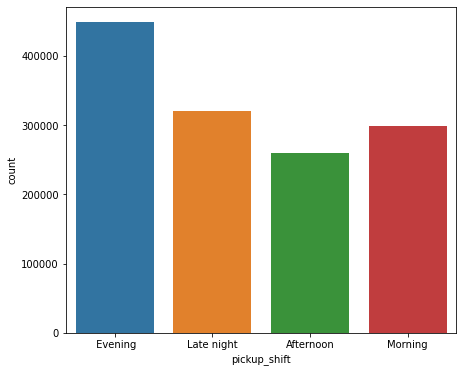

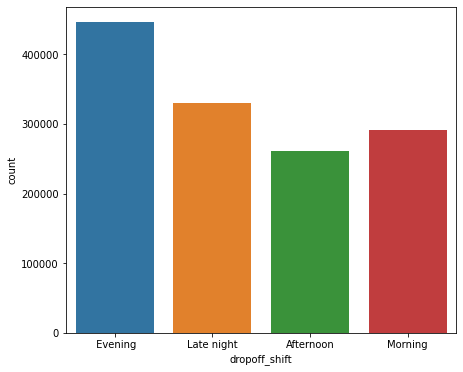

In [ ]:
# Trips based on shifts
plt.figure(figsize=(7,6))
sns.countplot(df_copy['pickup_shift'])
plt.figure(figsize=(7,6))
sns.countplot(df_copy['dropoff_shift'])

# Bivariate EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


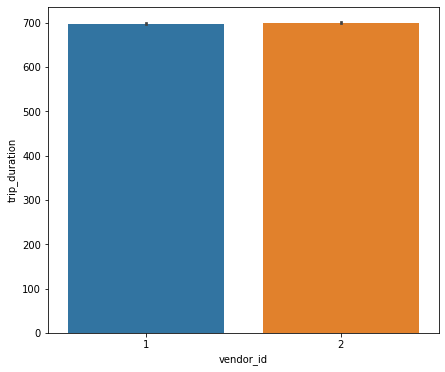

In [ ]:
# Trip duration with vendor
plt.figure(figsize=(7,6))
sns.barplot(df_copy['vendor_id'],df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


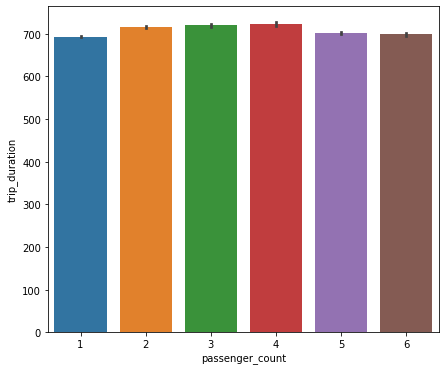

In [ ]:
# Trip duration based on passenger counts
plt.figure(figsize=(7,6))
sns.barplot(df_copy['passenger_count'],df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


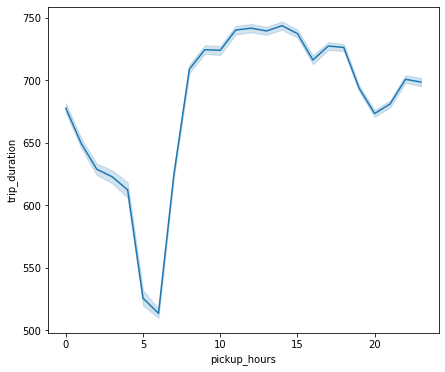

In [ ]:
# Trip duration based on hours
plt.figure(figsize=(7,6))
sns.lineplot(df_copy['pickup_hours'],df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


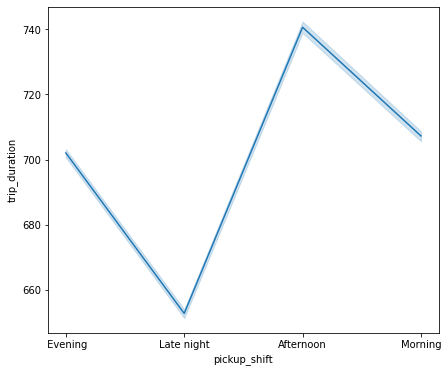

In [ ]:
# Trip duration based on shift
plt.figure(figsize=(7,6))
sns.lineplot(df_copy['pickup_shift'],df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


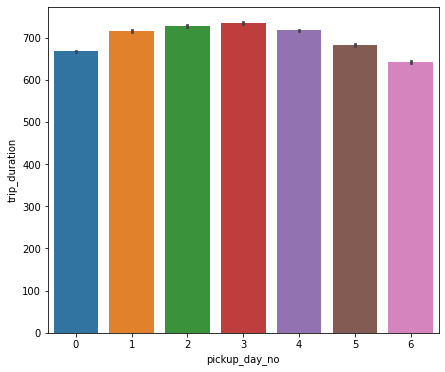

In [ ]:
#Trip duration per day of week
plt.figure(figsize=(7,6))
sns.barplot(df_copy['pickup_day_no'],df_copy['trip_duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


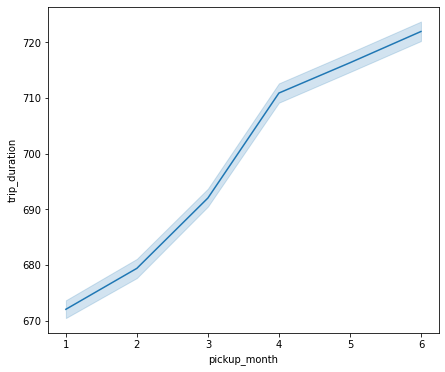

In [ ]:
#Trip duration based on month
plt.figure(figsize=(7,6))
sns.lineplot(df_copy['pickup_month'],df_copy['trip_duration'])

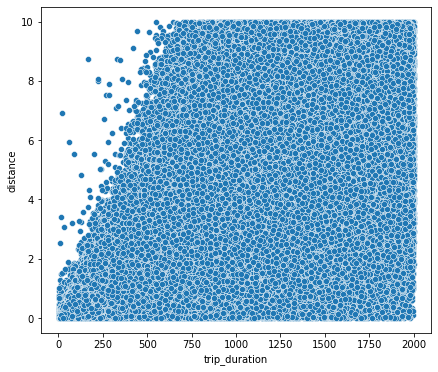

In [ ]:
# Trip duration and distance
plt.figure(figsize=(7,6))
sns.scatterplot(y=df_copy['distance'],x=df_copy['trip_duration'])

We can see that some distance are large but still the trip duration is 0. There is a possibility that latitude and longitude are error or not reorded the updated position while collecting the data

In [ ]:
df_copy['trip_duration'].value_counts()

368     1621
348     1579
367     1576
358     1574
408     1574
        ... 
1993      67
1986      67
2000      64
1973      63
1         21
Name: trip_duration, Length: 2000, dtype: int64

# Correlations between variables

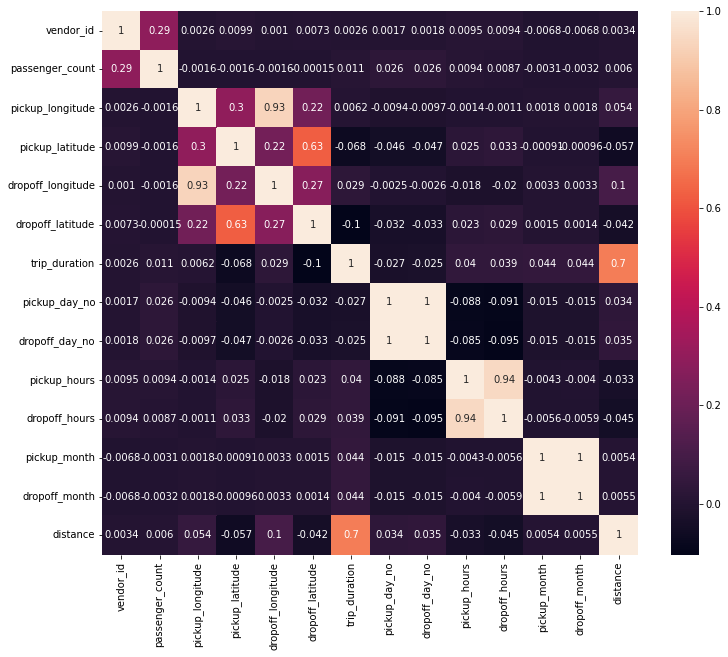

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(),annot=True)

In [ ]:
# Calculating Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(df_copy[[i for i in df_copy.describe().columns]])

,variables,VIF
0,vendor_id,1.140949e+01
1,passenger_count,2.844722e+00
2,pickup_longitude,1.280501e+07
3,pickup_latitude,4.352627e+06
4,dropoff_longitude,1.301143e+07
5,dropoff_latitude,4.019099e+06
6,trip_duration,7.776968e+00
7,pickup_day_no,4.670832e+02
8,dropoff_day_no,4.675860e+02
9,pickup_hours,5.590294e+01


Here every variable correlation data is less than 10

In [ ]:
df_copy

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hours,dropoff_hours,pickup_month,dropoff_month,pickup_shift,dropoff_shift,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Monday,Monday,0,0,17,17,3,3,Evening,Evening,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,Sunday,Sunday,6,6,0,0,6,6,Late night,Late night,1.805510
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,Wednesday,Wednesday,2,2,19,19,4,4,Evening,Evening,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,Saturday,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,1.188590
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,Saturday,Saturday,5,5,22,22,1,1,Late night,Late night,1.098944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778,Friday,Friday,4,4,13,13,4,4,Afternoon,Afternoon,1.225082
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655,Sunday,Sunday,6,6,7,7,1,1,Morning,Morning,6.049844
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764,Friday,Friday,4,4,6,7,4,4,Late night,Morning,7.824617
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373,Tuesday,Tuesday,1,1,15,16,1,1,Afternoon,Evening,1.092565


# Train_Test_split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [ ]:
numeric_data=['passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude',
              'pickup_day_no', 'dropoff_day_no', 'pickup_hours', 'dropoff_hours','pickup_month', 'dropoff_month', 'distance']

# numeric_data=['passenger_count','distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','vendor_id']

In [ ]:
from scipy.stats import zscore
X=df_copy[numeric_data]
y=np.log10(df_copy['trip_duration'])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
print('X_train=',X_train.shape)
print('X_test=',X_test.shape)
print('y_train=',y_train.shape)
print('y_test=',y_test.shape)

X_train= (1067395, 12)
X_test= (266849, 12)
y_train= (1067395,)
y_test= (266849,)


# Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg=LinearRegression()

In [ ]:
reg=lin_reg.fit(X_train,y_train)

In [ ]:
reg.score(X_train,y_train)

0.4210104606371017

In [ ]:
reg.coef_

array([ 0.00320353, -0.02215652,  0.19553239, -0.26732472, -0.63348519,
       -0.02753599,  0.02129397, -0.00182099,  0.00505316, -0.07143381,
        0.07692117,  0.10249842])

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MAE=',MAE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

r2=r2_score(y_test,y_pred)
print('r2=',r2)

MSE= 0.054622194608646056
MAE= 0.17158868543359435
RMSE= 0.2337139161638563
r2= 0.4136750647288394


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['agg.path.chunksize'] = 10000

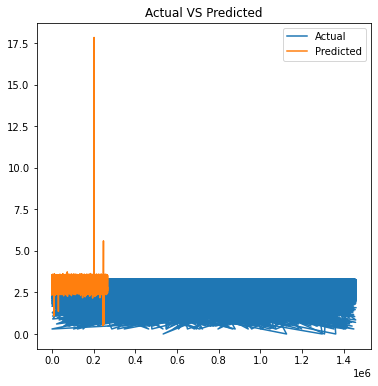

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted')
plt.show()

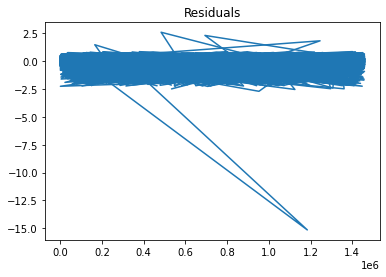

In [ ]:
#Residuals
plt.title('Residuals')
plt.plot((y_test)-(y_pred))

Text(0, 0.5, 'residuals')

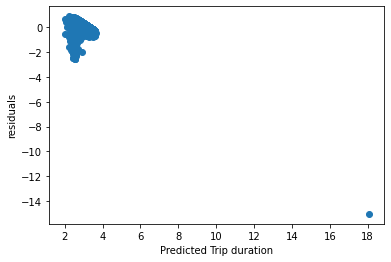

In [ ]:
#Finding Heteroscedasticity

plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted Trip duration')
plt.ylabel('residuals')

We can see from the above heteroscedasticity test that it is neither homo or hetero, so we will skip this model

# Applying OLS in Linear Regression model to find the coefficients

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X=sm.add_constant(X) #intercept b0
model=sm.OLS(y,X).fit() #OLS(output,input)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 8.051e+04
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:10:55   Log-Likelihood:                 50882.
No. Observations:             1334244   AIC:                        -1.017e+05
Df Residuals:                 1334231   BIC:                        -1.016e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6849      0.446     10.496      0.000       3.810       5.560
passenger_count       0.0031      0.000     20.339      0.000       0.003       0.003
pickup_longitude      0.0289      0.010      2.920      0.004       0.010       0.048
pickup_latitude       0.2152      0.011     18.963      0.000       0.193       0.237
dropoff_longitude    -0.2252      0.010    -22.846      0.000      -0.245      -0.206
dropoff_latitude     -0.6263      0.010    -61.797      0.000      -0.646      -0.606
pickup_day_no        -0.0279      0.001    -23.304      0.000      -0.030      -0.026
dropoff_day_no        0.0218      0.001     18.163      0.000       0.019       0.024
pickup_hours         -0.0019      0.000    -18.621      0.000      -0.002      -0.002
dropoff_hours         0.0051   9.93e-05     51.370      0.000       0.005       0.005
pickup_month         -0.0732      0.013     -5.592      0.000      -0.099      -0.048
dropoff_month         0.0788      0.013      6.019      0.000       0.053       0.104
distance              0.1022      0.000    962.973      0.000       0.102       0.102
==============================================================================
Omnibus:                   541906.667   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10853876.882
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                      16.662   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ridge regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge=Ridge(alpha=0.01)

In [ ]:
ridge_regression=ridge.fit(X_train,y_train)

In [ ]:
ridge_regression.score(X_train,y_train)

0.4210104606357129

In [ ]:
y_pred=reg.predict(X_test)

In [ ]:
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)
MAE=mean_absolute_error(y_test,y_pred)
print('MAE=',MAE)
RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

r2=r2_score(y_test,y_pred)
print('r2=',r2)

MSE= 0.054622194608646056
MAE= 0.17158868543359435
RMSE= 0.2337139161638563
r2= 0.4136750647288394


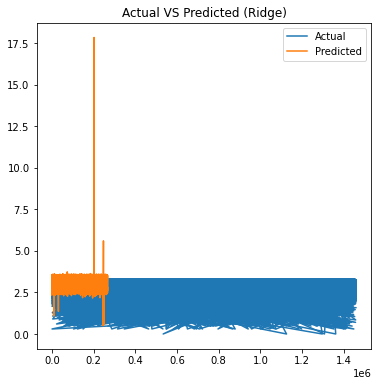

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted (Ridge)')
plt.show()

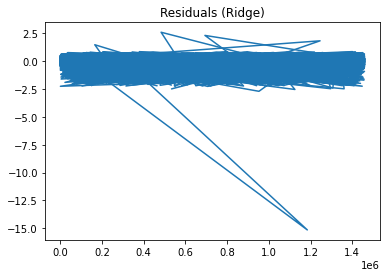

In [ ]:
#Residuals
plt.title('Residuals (Ridge)')
plt.plot((y_test)-(y_pred))

# OLS Regression ANOVA Table

In [ ]:
import statsmodels.api as sm

In [ ]:
X=sm.add_constant(X) #intercept b0
model=sm.OLS(y,X).fit() #OLS(output,input)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 8.051e+04
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:19:22   Log-Likelihood:                 50882.
No. Observations:             1334244   AIC:                        -1.017e+05
Df Residuals:                 1334231   BIC:                        -1.016e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6849      0.446     10.496      0.000       3.810       5.560
passenger_count       0.0031      0.000     20.339      0.000       0.003       0.003
pickup_longitude      0.0289      0.010      2.920      0.004       0.010       0.048
pickup_latitude       0.2152      0.011     18.963      0.000       0.193       0.237
dropoff_longitude    -0.2252      0.010    -22.846      0.000      -0.245      -0.206
dropoff_latitude     -0.6263      0.010    -61.797      0.000      -0.646      -0.606
pickup_day_no        -0.0279      0.001    -23.304      0.000      -0.030      -0.026
dropoff_day_no        0.0218      0.001     18.163      0.000       0.019       0.024
pickup_hours         -0.0019      0.000    -18.621      0.000      -0.002      -0.002
dropoff_hours         0.0051   9.93e-05     51.370      0.000       0.005       0.005
pickup_month         -0.0732      0.013     -5.592      0.000      -0.099      -0.048
dropoff_month         0.0788      0.013      6.019      0.000       0.053       0.104
distance              0.1022      0.000    962.973      0.000       0.102       0.102
==============================================================================
Omnibus:                   541906.667   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10853876.882
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                      16.662   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#Cross Validation for Ridge using Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 100}

Using  {'alpha': 100}  the negative mean squared error is:  -0.05571379032926813


# Making the Lambda value to 100 as per CV and testing that

In [ ]:
ridge=Ridge(alpha=100)

In [ ]:
ridge_regression=ridge.fit(X_train,y_train)

In [ ]:
ridge_regression.score(X_train,y_train)

0.42093744276295414

In [ ]:
y_pred=reg.predict(X_test)

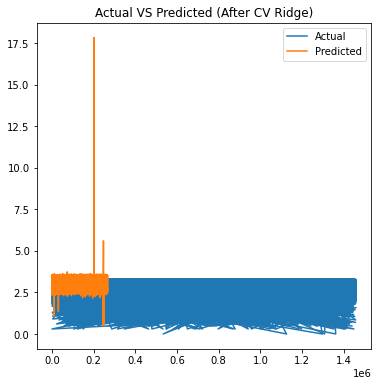

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test)
plt.plot(y_pred)
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted (After CV Ridge)')
plt.show()

After making the hyper parameter value of lambda to 100,Still there is no improvement in Ridge regression. Let's check with Lasso

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.005,max_iter=3000)

In [ ]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train,y_train)

0.41395327717859115

In [ ]:
y_pred_lasso=lasso.predict(X_test)

In [ ]:
MSE=mean_squared_error((y_test),(y_pred_lasso))
MAE=mean_absolute_error((y_test),(y_pred_lasso))
RMSE=np.sqrt(MSE)
print('MSE= ',MSE)
print('MAE= ',MAE)
print('RMSE= ',RMSE)

r2=r2_score(y_test,y_pred)
print('r2=',r2)

MSE=  0.05447674952599213
MAE=  0.17311112184901054
RMSE=  0.2334025482422849
r2= 0.4136750647288394


Text(0.5, 1.0, 'Actual VS Predicted(Lasso)')

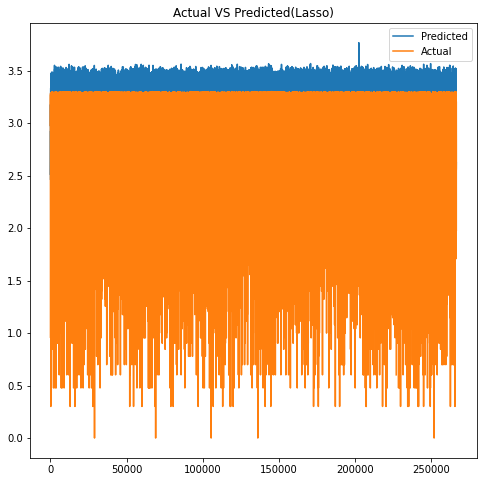

In [ ]:
plt.figure(figsize=(8,8))
plt.plot((y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(['Predicted','Actual'])
plt.title('Actual VS Predicted(Lasso)')

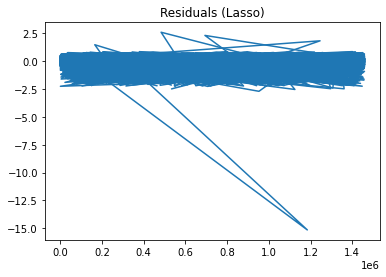

In [ ]:
#Residuals
plt.title('Residuals (Lasso)')
plt.plot((y_test)-(y_pred))

In [ ]:
X=sm.add_constant(X) #intercept b0
model=sm.OLS(y,X).fit() #OLS(output,input)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                 8.051e+04
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:29:48   Log-Likelihood:                 50882.
No. Observations:             1334244   AIC:                        -1.017e+05
Df Residuals:                 1334231   BIC:                        -1.016e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 4.6849      0.446     10.496      0.000       3.810       5.560
passenger_count       0.0031      0.000     20.339      0.000       0.003       0.003
pickup_longitude      0.0289      0.010      2.920      0.004       0.010       0.048
pickup_latitude       0.2152      0.011     18.963      0.000       0.193       0.237
dropoff_longitude    -0.2252      0.010    -22.846      0.000      -0.245      -0.206
dropoff_latitude     -0.6263      0.010    -61.797      0.000      -0.646      -0.606
pickup_day_no        -0.0279      0.001    -23.304      0.000      -0.030      -0.026
dropoff_day_no        0.0218      0.001     18.163      0.000       0.019       0.024
pickup_hours         -0.0019      0.000    -18.621      0.000      -0.002      -0.002
dropoff_hours         0.0051   9.93e-05     51.370      0.000       0.005       0.005
pickup_month         -0.0732      0.013     -5.592      0.000      -0.099      -0.048
dropoff_month         0.0788      0.013      6.019      0.000       0.053       0.104
distance              0.1022      0.000    962.973      0.000       0.102       0.102
==============================================================================
Omnibus:                   541906.667   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10853876.882
Skew:                          -1.465   Prob(JB):                         0.00
Kurtosis:                      16.662   Cond. No.                     2.68e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Applying Grid CV cross validation for Lasso

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21428.769547504526, tolerance: 7.4819552895873205
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21725.009667679475, tolerance: 7.495490571191262
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21730.023937385555, tolerance: 7.495363448273918
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21742.94

GridSearchCV(cv=4, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.0547676940163262


In [ ]:
lasso=Lasso(alpha=0.001,max_iter=3000)
lasso.fit(X_train,y_train)
lasso.score(X_train,y_train)

0.41499801477848663

In [ ]:
y_pred_lasso=lasso.predict(X_test)

In [ ]:
MSE=mean_squared_error((y_test),(y_pred_lasso))
MAE=mean_absolute_error((y_test),(y_pred_lasso))
RMSE=np.sqrt(MSE)
print('MSE= ',MSE)
print('MAE= ',MAE)
print('RMSE= ',RMSE)

r2=r2_score(y_test,y_pred)
print('r2=',r2)

MSE=  0.05447674952599213
MAE=  0.17311112184901054
RMSE=  0.2334025482422849
r2= 0.4136750647288394


Text(0.5, 1.0, 'Actual VS Predicted(After CV Lasso)')

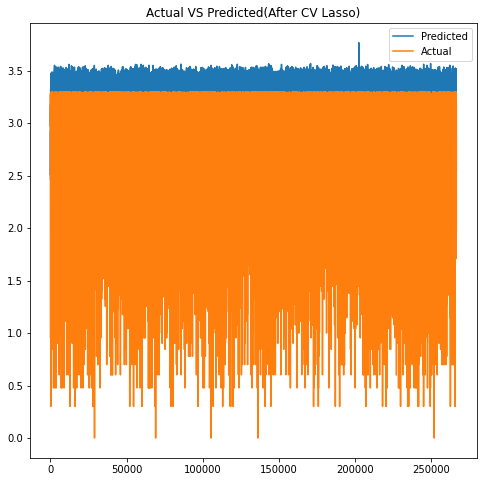

In [ ]:
plt.figure(figsize=(8,8))
plt.plot((y_pred_lasso))
plt.plot(np.array((y_test)))
plt.legend(['Predicted','Actual'])
plt.title('Actual VS Predicted(After CV Lasso)')


We will skip Lasso as well, as it gives 42% for R2 score

#Elastic Net regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.40243073410785524

In [ ]:
y_pred_elastic = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_elastic))
print("R2 :" ,r2)

MSE : 0.055627773609576256
RMSE : 0.23585540826865992
R2 : 0.4028809901433208


Text(0.5, 1.0, 'Actual VS Predicted(Elastic Net)')

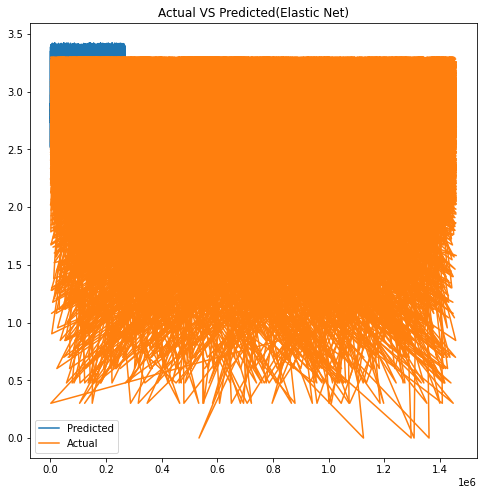

In [ ]:
plt.figure(figsize=(8,8))
plt.plot((y_pred_elastic))
plt.plot((y_test))
plt.legend(['Predicted','Actual'])
plt.title('Actual VS Predicted(Elastic Net)')

We will skip Elasticnet as it's r2_score is only 40%

# XGB Boost


Extreme Gradient Boosting (XGBoost) is an  efficient and effective implementation of the gradient boosting algorithm. ... XGBoost is an efficient implementation of gradient boosting that can be used for regression predictive modeling.

In [ ]:
from xgboost.sklearn import XGBRegressor
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[18:23:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb.score(X_train,y_train)

0.665548011651159

In [ ]:
#Train Score
xgb_train_score=xgb.score(X_train,y_train)
xgb_train_score

0.665548011651159

In [ ]:
#Test Score
xgb_test_score=xgb.score(X_test,y_test)
xgb_test_score

0.6632394177950316

In [ ]:
MSE  = mean_squared_error((y_test),(xgb_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(xgb_pred))
print("R2 :" ,r2)

MSE : 0.03137270982550603
RMSE : 0.17712343104599693
R2 : 0.6632394177950316


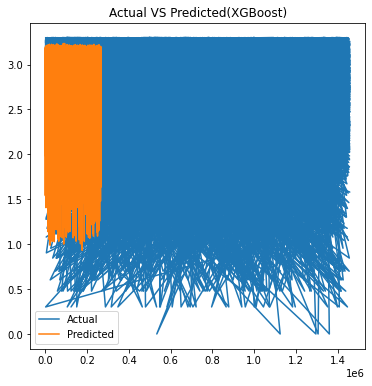

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test)
plt.plot(xgb_pred)
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted(XGBoost)')
plt.show()

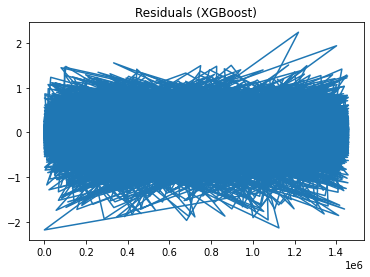

In [ ]:
#Residual
plt.title('Residuals (XGBoost)')
plt.plot(y_test-xgb_pred)

# Cross Validation hyper parameter for XGBOOST

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid of hyperparameters to search over
param_grid_gb = {'learning_rate': [0.01,0.1,0.5,0.9],
              'n_estimators' : [200],
              'subsample' : [0.3,0.5,0.9]}

In [ ]:
mse_grid = GridSearchCV(estimator = xgb, param_grid = param_grid_gb, scoring = 'neg_mean_squared_error', cv = 4, verbose = 1)

In [ ]:
mse_grid.fit(X,y)

print("Best parameter: ", mse_grid.best_params_)
print("Lowest RMSE: ", np.sqrt(np.abs(mse_grid.best_score_)))

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[08:32:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:35:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:37:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:39:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:42:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:44:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:47:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:49:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 145.8min finished


[10:58:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best parameter:  {'learning_rate': 0.9, 'n_estimators': 200, 'subsample': 0.9}
Lowest RMSE:  0.15594592759914605


# Applying hyper parameters(eta=0.9)

In [ ]:
xgb= XGBRegressor(eta=0.9)
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

[18:30:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
xgb.score(X_train,y_train)

0.665548011651159

In [ ]:
#Train Score
xgb_train_score=xgb.score(X_train,y_train)
xgb_train_score

0.665548011651159

In [ ]:
#Test Score
xgb_test_score=xgb.score(X_test,y_test)
xgb_test_score

0.6632394177950316

In [ ]:
MSE  = mean_squared_error((y_test),(xgb_pred))
print("MSE :" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(xgb_pred))
print("R2 :" ,r2)

MSE : 0.03137270982550603
RMSE : 0.17712343104599693
R2 : 0.6632394177950316


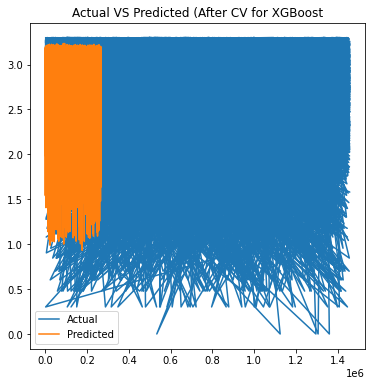

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(y_test)
plt.plot(xgb_pred)
plt.legend(['Actual','Predicted'])
plt.title('Actual VS Predicted (After CV for XGBoost')
plt.show()

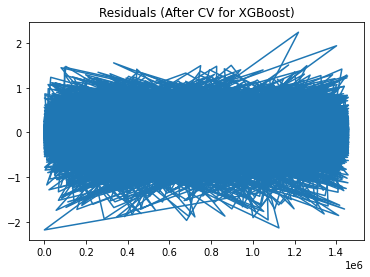

In [ ]:
#Residual
plt.title('Residuals (After CV for XGBoost)')
plt.plot(y_test-xgb_pred)